In [1]:
#Importing the libraries
import pandas as pd
#To make DataReader working otherwise it won't due to compatibility error
pd.core.common.is_list_like = pd.api.types.is_list_like 
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

Questions:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

1.) What was the change in price of the stock over time?

In [2]:
#Company list
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Setting up the timeframe
end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

# Extract data using Robinhood API

all_prices_ = data.get_data_robinhood((tech_list), start = start,end = end)

In [3]:
all_prices_.head(10)

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
AAPL   2017-09-01  161.606500  162.483200         False  161.192800   
       2017-09-05  159.665800  161.803500         False  158.168500   
       2017-09-06  159.498400  160.562300         False  158.129100   
       2017-09-07  158.858100  159.823500         False  157.971500   
       2017-09-08  156.267200  158.749700         False  156.168700   
       2017-09-11  159.094500  159.636300         False  157.508500   
       2017-09-12  158.464000  161.517800         False  156.405100   
       2017-09-13  157.272000  157.577400         False  155.558000   
       2017-09-14  155.922400  157.025800         False  155.735300   
       2017-09-15  157.498600  158.572400         False  155.646600   

                   open_price session    volume  
symbol begins_at                                 
AAPL   2017-09-01  162.345300     reg  16591051  
       2017-09-05  161.311000     reg  29468495  
       2017-09-06  160.286500     reg  21651726  
       2017-09-07  159.675700     reg  21928502  
       2017-09-08  158.464000     reg  28611535  
       2017-09-11  158.109400     reg  31580798  
       2017-09-12  160.187900     reg  71714046  
       2017-09-13  157.488800     reg  44907361  
       2017-09-14  156.621900     reg  23760749  
       2017-09-15  156.109600     reg  49114602

In [19]:
columns = ['close_price','high_price','low_price','open_price','volume']

In [52]:
for company in tech_list:
    print(company)
    globals()[company] = all_prices_.loc[company]

AAPL
GOOG
MSFT
AMZN


In [53]:
for column in columns:
        AAPL[column] = AAPL[column].replace(",",".").astype("float")
for column in columns:
        GOOG[column] = GOOG[column].replace(",",".").astype("float")
for column in columns:
        MSFT[column] = MSFT[column].replace(",",".").astype("float")
for column in columns:
        AMZN[column] = AMZN[column].replace(",",".").astype("float")

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

In [46]:
AMZN.dtypes

begins_at       datetime64[ns]
close_price            float64
high_price             float64
interpolated              bool
low_price              float64
open_price             float64
session                 object
volume                 float64
dtype: object

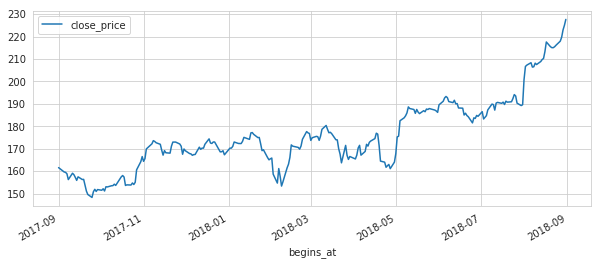

In [60]:
# Let's see a historical view of the closing price
AAPL['close_price'].plot(legend=True,figsize=(10,4))

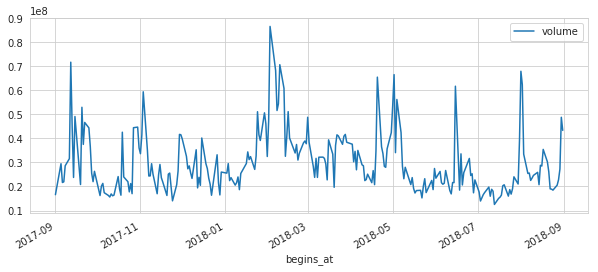

In [61]:
#Let's see the volume trades
AAPL['volume'].plot(legend=True,figsize = (10,4))

In [68]:
#Creating a list of the movering average days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for {} days".format(ma)
    AAPL[column_name]= AAPL['close_price'].rolling(ma).mean()

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-09-01 to 2018-08-31
Data columns (total 10 columns):
close_price       252 non-null float64
high_price        252 non-null float64
interpolated      252 non-null bool
low_price         252 non-null float64
open_price        252 non-null float64
session           252 non-null object
volume            252 non-null float64
MA for 10 days    243 non-null float64
MA for 20 days    233 non-null float64
MA for 50 days    203 non-null float64
dtypes: bool(1), float64(8), object(1)
memory usage: 19.9+ KB


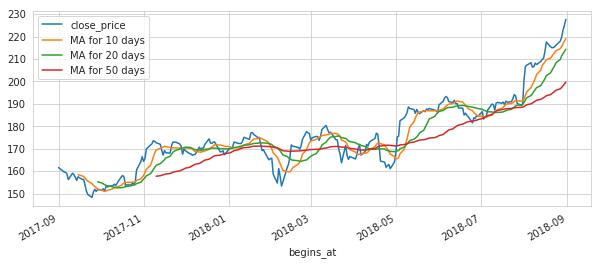

In [72]:
#Let's plot everything
AAPL[['close_price','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,legend=True,figsize=(10,4))

    2.) What was the daily return of the stock on average?

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


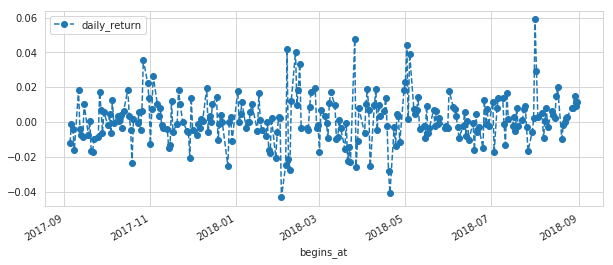

In [78]:
AAPL['daily_return'] = AAPL['close_price'].pct_change()#pct_change to have the value in percent
AAPL['daily_return'].plot(legend=True, figsize=(10,4),linestyle="--",marker="o")

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


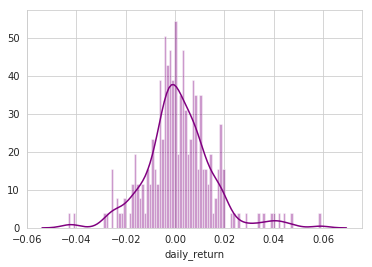

In [82]:
sns.distplot(AAPL['daily_return'].dropna(),bins=100,color="purple")

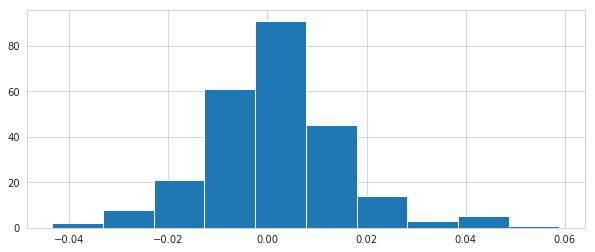

In [84]:
#Using pandas instead of Seaborn
AAPL['daily_return'].hist(figsize=(10,4))

In [89]:
#Having every closing price in one DataFrame
closing_df = pd.DataFrame(all_prices_['close_price'])

In [92]:
closing_df.head(10)

close_price
symbol begins_at             
AAPL   2017-09-01  161.606500
       2017-09-05  159.665800
       2017-09-06  159.498400
       2017-09-07  158.858100
       2017-09-08  156.267200
       2017-09-11  159.094500
       2017-09-12  158.464000
       2017-09-13  157.272000
       2017-09-14  155.922400
       2017-09-15  157.498600

In [97]:
# Make a new tech returns DataFrame
closing_df['close_price'] = closing_df['close_price'].replace(",",".").astype("float")

tech_rets = closing_df.pct_change()

In [99]:
tech_rets.head(10)

close_price
symbol begins_at              
AAPL   2017-09-01          NaN
       2017-09-05    -0.012009
       2017-09-06    -0.001048
       2017-09-07    -0.004014
       2017-09-08    -0.016310
       2017-09-11     0.018093
       2017-09-12    -0.003963
       2017-09-13    -0.007522
       2017-09-14    -0.008581
       2017-09-15     0.010109

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


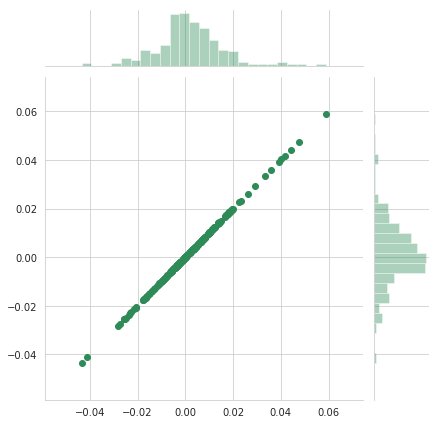

In [108]:
#let's plot them!
sns.jointplot(tech_rets.loc['AAPL'],tech_rets.loc['AAPL'],tech_rets,kind = 'scatter',color = 'seagreen')

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


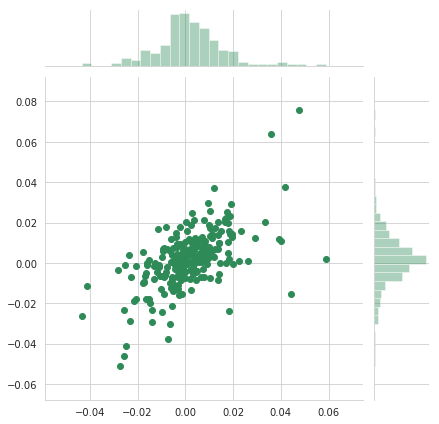

In [110]:
#Compare two companies
sns.jointplot(tech_rets.loc['AAPL'],tech_rets.loc['MSFT'],tech_rets,kind = 'scatter',color = 'seagreen')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

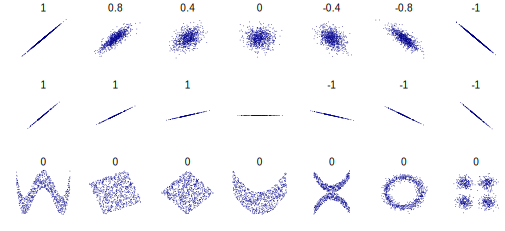

In [111]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')